In [1]:
#bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#leitura dos dados

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
print("Shape: ", dataset.shape)
dataset.head().style.background_gradient(cmap='coolwarm')

Shape:  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.describe().style.background_gradient(cmap='coolwarm')

,User ID,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,15691539.757500,37.655000,69742.500000,0.357500
std,71658.321581,10.482877,34096.960282,0.479864
min,15566689.000000,18.000000,15000.000000,0.000000
25%,15626763.750000,29.750000,43000.000000,0.000000
50%,15694341.500000,37.000000,70000.000000,0.000000
75%,15750363.000000,46.000000,88000.000000,1.000000
max,15815236.000000,60.000000,150000.000000,1.000000


In [4]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4].values

print(X[0:6,:])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]
 [   27 58000]]


In [6]:
#Separação do conjunto de dados e testes e normalização (extremamente recomendado para SVMs)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=0)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

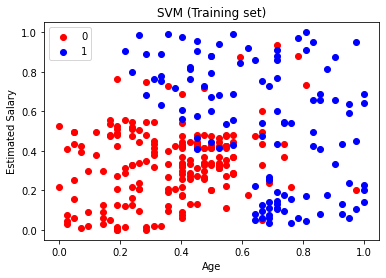

In [7]:
X_set, y_set = X_train, y_train

#pontos vermelhos e azuis

plt.scatter(X_set[y_set == 0,0], X_set[y_set == 0,1], color = 'red',label=0)
plt.scatter(X_set[y_set == 1,0], X_set[y_set == 1,1], color = 'blue',label=1)

plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

SVM LINEAR

In [8]:
#Roda o algoritmo SVM LINEAR e verifica os resultados da predição e a acurácia total

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'linear', C= 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%")

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]

Acuracia: 89.0 %


In [9]:
#Calcula a matriz de confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusão: \n VP  FN")
print(cm)
print(" FP  VN")

Matriz de confusão: 
 VP  FN
[[67  1]
 [10 22]]
 FP  VN


SVM RBF

In [10]:
#Roda o algoritmo SVM com Kernel RBF e verifica os resultados da predição e a acurácia total

classifierRBF = SVC(kernel = "rbf", gamma = 1, C=1)
classifierRBF.fit(X_train, y_train)

y_predRBF = classifierRBF.predict(X_test)
print(y_test[0:35])
print(y_predRBF[0:35])

print("Acurácia: ", accuracy_score(y_test, y_predRBF)*100, "%")

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
Acurácia:  91.0 %


In [11]:
cmRBF = confusion_matrix(y_test, y_predRBF)
print(cmRBF)

[[64  4]
 [ 5 27]]


In [12]:
def chamaprint(titulo):

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    plt.scatter(X_set[y_set == 0,0], X_set[y_set == 0,1], color = 'red',label=0)
    plt.scatter(X_set[y_set == 1,0], X_set[y_set == 1,1], color = 'blue',label=1)

    plt.title(titulo)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

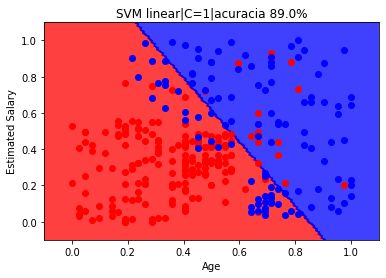

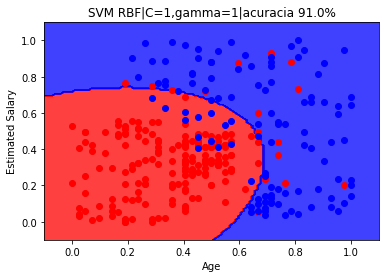

In [13]:
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = -0.1, stop = 1.1, step = 0.01,),
                     np.arange(start = -0.1, stop = 1.1, step = 0.01,))


plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
chamaprint("SVM linear|C=1|acuracia " + str(accuracy_score(y_test, y_pred)*100) + "%")

plt.contourf(X1,X2, classifierRBF.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
chamaprint("SVM RBF|C=1,gamma=1|acuracia " + str(accuracy_score(y_test, y_predRBF)*100) + "%")


# **E se alterarmos os Hiperparâmetros? O que acontece com o modelo?**

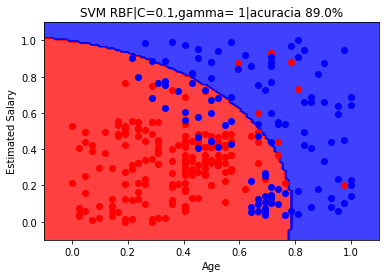

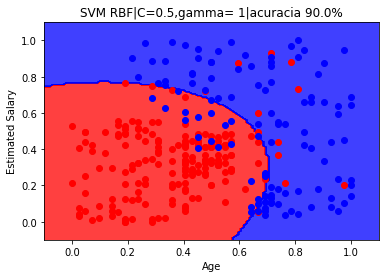

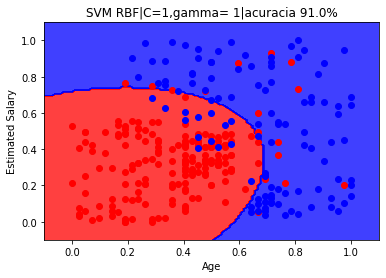

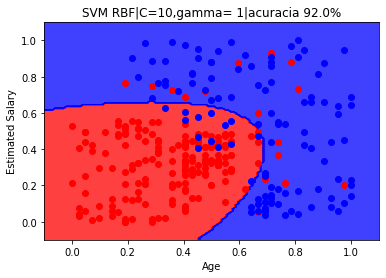

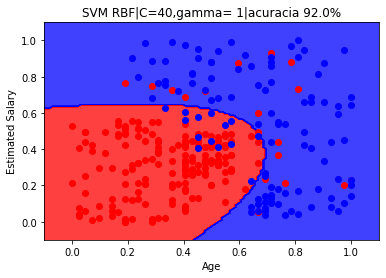

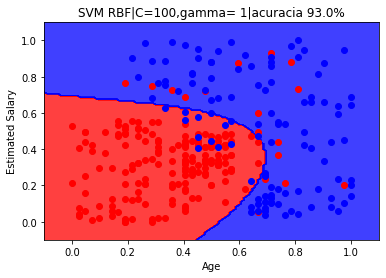

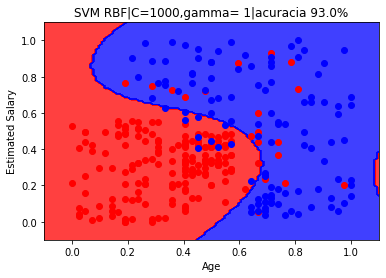

In [14]:
c = [0.1,0.5,1,10,40,100,1000]

for i in c:
  classifierRBF = SVC(kernel = "rbf", gamma = 1, C=i)
  classifierRBF.fit(X_train, y_train)
  y_predRBF = classifierRBF.predict(X_test)
  X1, X2 = np.meshgrid(np.arange(start = -0.1, stop = 1.1, step = 0.01,),
                        np.arange(start = -0.1, stop = 1.1, step = 0.01,))
    
  plt.contourf(X1,X2, classifierRBF.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                            alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
  chamaprint("SVM RBF|C=" + str(i) + ",gamma= 1|acuracia " + str(accuracy_score(y_test, y_predRBF)*100) + "%")



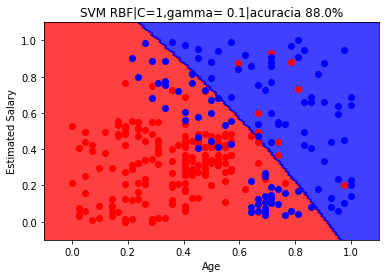

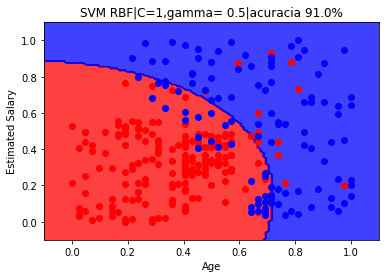

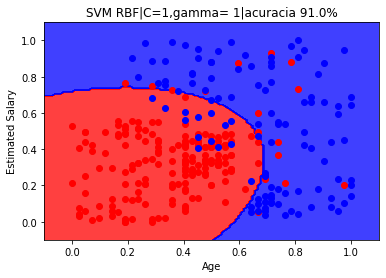

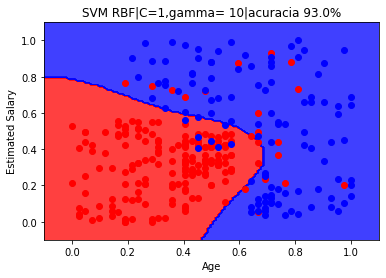

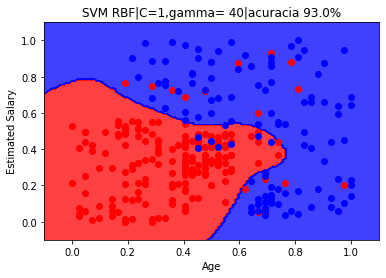

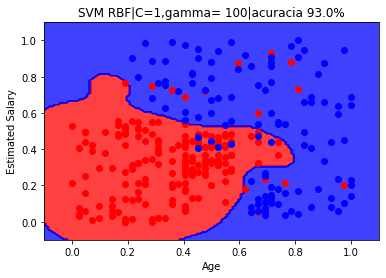

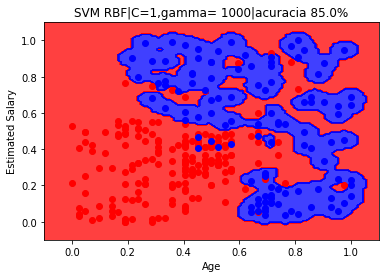

In [15]:
gamma = [0.1,0.5,1,10,40,100,1000]
for i in c:
  classifierRBF = SVC(kernel = "rbf", gamma = i, C=1)
  classifierRBF.fit(X_train, y_train)
  y_predRBF = classifierRBF.predict(X_test)
  X1, X2 = np.meshgrid(np.arange(start = -0.1, stop = 1.1, step = 0.01,),
                        np.arange(start = -0.1, stop = 1.1, step = 0.01,))
    
  plt.contourf(X1,X2, classifierRBF.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                            alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
  chamaprint("SVM RBF|C=1,gamma= " + str(i) + "|acuracia " + str(accuracy_score(y_test, y_predRBF)*100) + "%")